# 4 - Phylogeny Reconstruction
Building a simple evolutionary tree using ancient Dog and Wolf DNA fragments.

In [19]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.makedirs("../plots", exist_ok=True)

In [27]:
# Load ancient Dog fragments
dog_fragments_path = '../ancient_dna/ancient_dog_fragments.fasta'
ancient_dog_fragments = list(SeqIO.parse(dog_fragments_path, 'fasta'))

# Load ancient Wolf fragments
wolf_fragments_path = '../ancient_dna/ancient_wolf_fragments.fasta'
ancient_wolf_fragments = list(SeqIO.parse(wolf_fragments_path, 'fasta'))

# Select a small sample (first 10 from each)
dog_sample = ancient_dog_fragments[:50]
wolf_sample = ancient_wolf_fragments[:50]

# Combine samples
combined_fragments = dog_sample + wolf_sample

print(f"Loaded {len(dog_sample)} Dog fragments and {len(wolf_sample)} Wolf fragments. Total: {len(combined_fragments)} fragments.")


Loaded 50 Dog fragments and 50 Wolf fragments. Total: 100 fragments.


In [30]:
# Initialize aligner
aligner = PairwiseAligner()
aligner.mode = 'local'
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

# Prepare an empty distance matrix
num_fragments = len(combined_fragments)
distance_matrix = np.zeros((num_fragments, num_fragments))

# Perform pairwise alignments
for i in range(num_fragments):
    for j in range(i + 1, num_fragments):
        alignments = aligner.align(combined_fragments[i].seq, combined_fragments[j].seq)
        if alignments:
            score = alignments[0].score
            distance = 1 / (1 + score)
        else:
            distance = 1.0   
            print(f"No alignment found between fragment {i} and {j}.")
        
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance  # symmetric matrix


No alignment found between fragment 4 and 31.
No alignment found between fragment 9 and 31.
No alignment found between fragment 11 and 31.
No alignment found between fragment 12 and 31.
No alignment found between fragment 22 and 31.
No alignment found between fragment 25 and 31.
No alignment found between fragment 26 and 31.
No alignment found between fragment 28 and 31.
No alignment found between fragment 30 and 31.
No alignment found between fragment 31 and 36.
No alignment found between fragment 31 and 39.
No alignment found between fragment 31 and 54.
No alignment found between fragment 31 and 55.
No alignment found between fragment 31 and 56.
No alignment found between fragment 31 and 57.
No alignment found between fragment 31 and 62.
No alignment found between fragment 31 and 64.
No alignment found between fragment 31 and 66.
No alignment found between fragment 31 and 67.
No alignment found between fragment 31 and 68.
No alignment found between fragment 31 and 69.
No alignment fo

In [32]:
frag = combined_fragments[31]
print(f"Fragment 31 ID: {frag.id}")
print(f"Length: {len(frag.seq)}")
print(f"Sequence:\n{frag.seq}")


Fragment 31 ID: ancient_dog_frag_31
Length: 31
Sequence:
ttttttattcgattcaaattttttttttttt


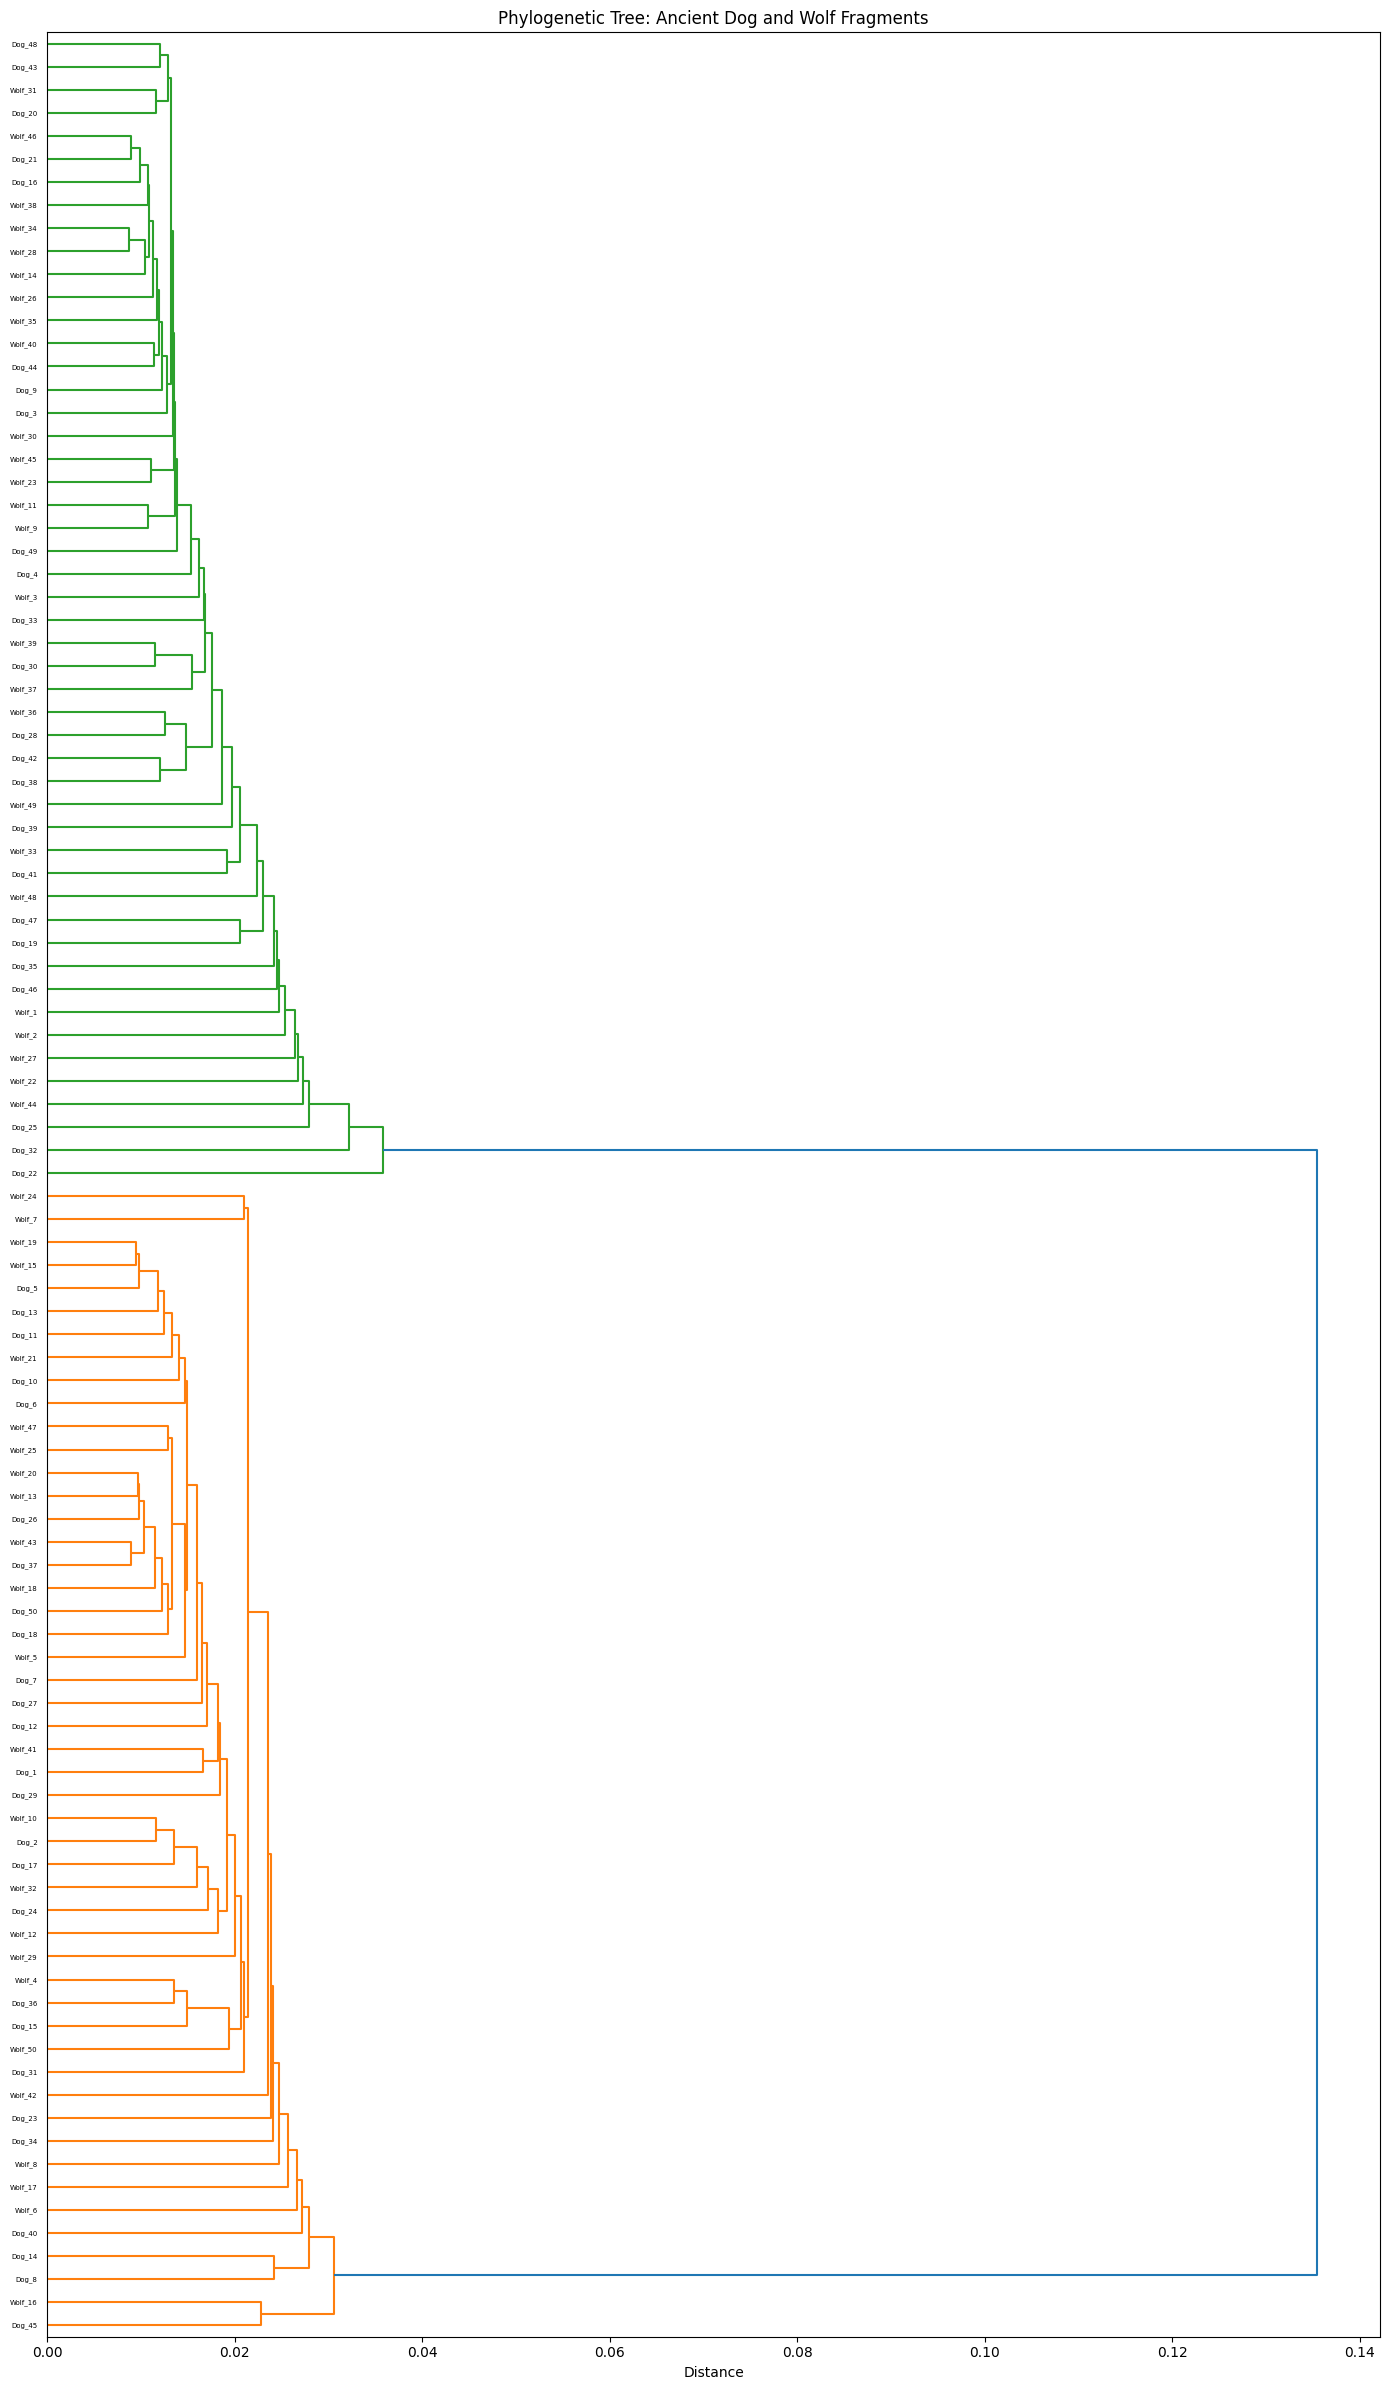

In [35]:
from scipy.spatial.distance import squareform

# Condense the distance matrix
condensed_distance = squareform(distance_matrix)

# building the tree properly to perform hierarchical clustering (UPGMA style)
linked = linkage(condensed_distance, method='average')

# Labels for the tree
labels = [f"Dog_{i}" for i in range(1, 51)] + [f"Wolf_{i}" for i in range(1, 51)]

# Plot the dendrogram (tree)
plt.figure(figsize=(14,24))
dendrogram(linked, labels=labels, orientation='right')
plt.title('Phylogenetic Tree: Ancient Dog and Wolf Fragments')
plt.xlabel('Distance')
plt.tight_layout()
plt.savefig("../plots/phylogeny_50_dog_50_wolf_uncolored.png", dpi=300, bbox_inches='tight')
plt.show()


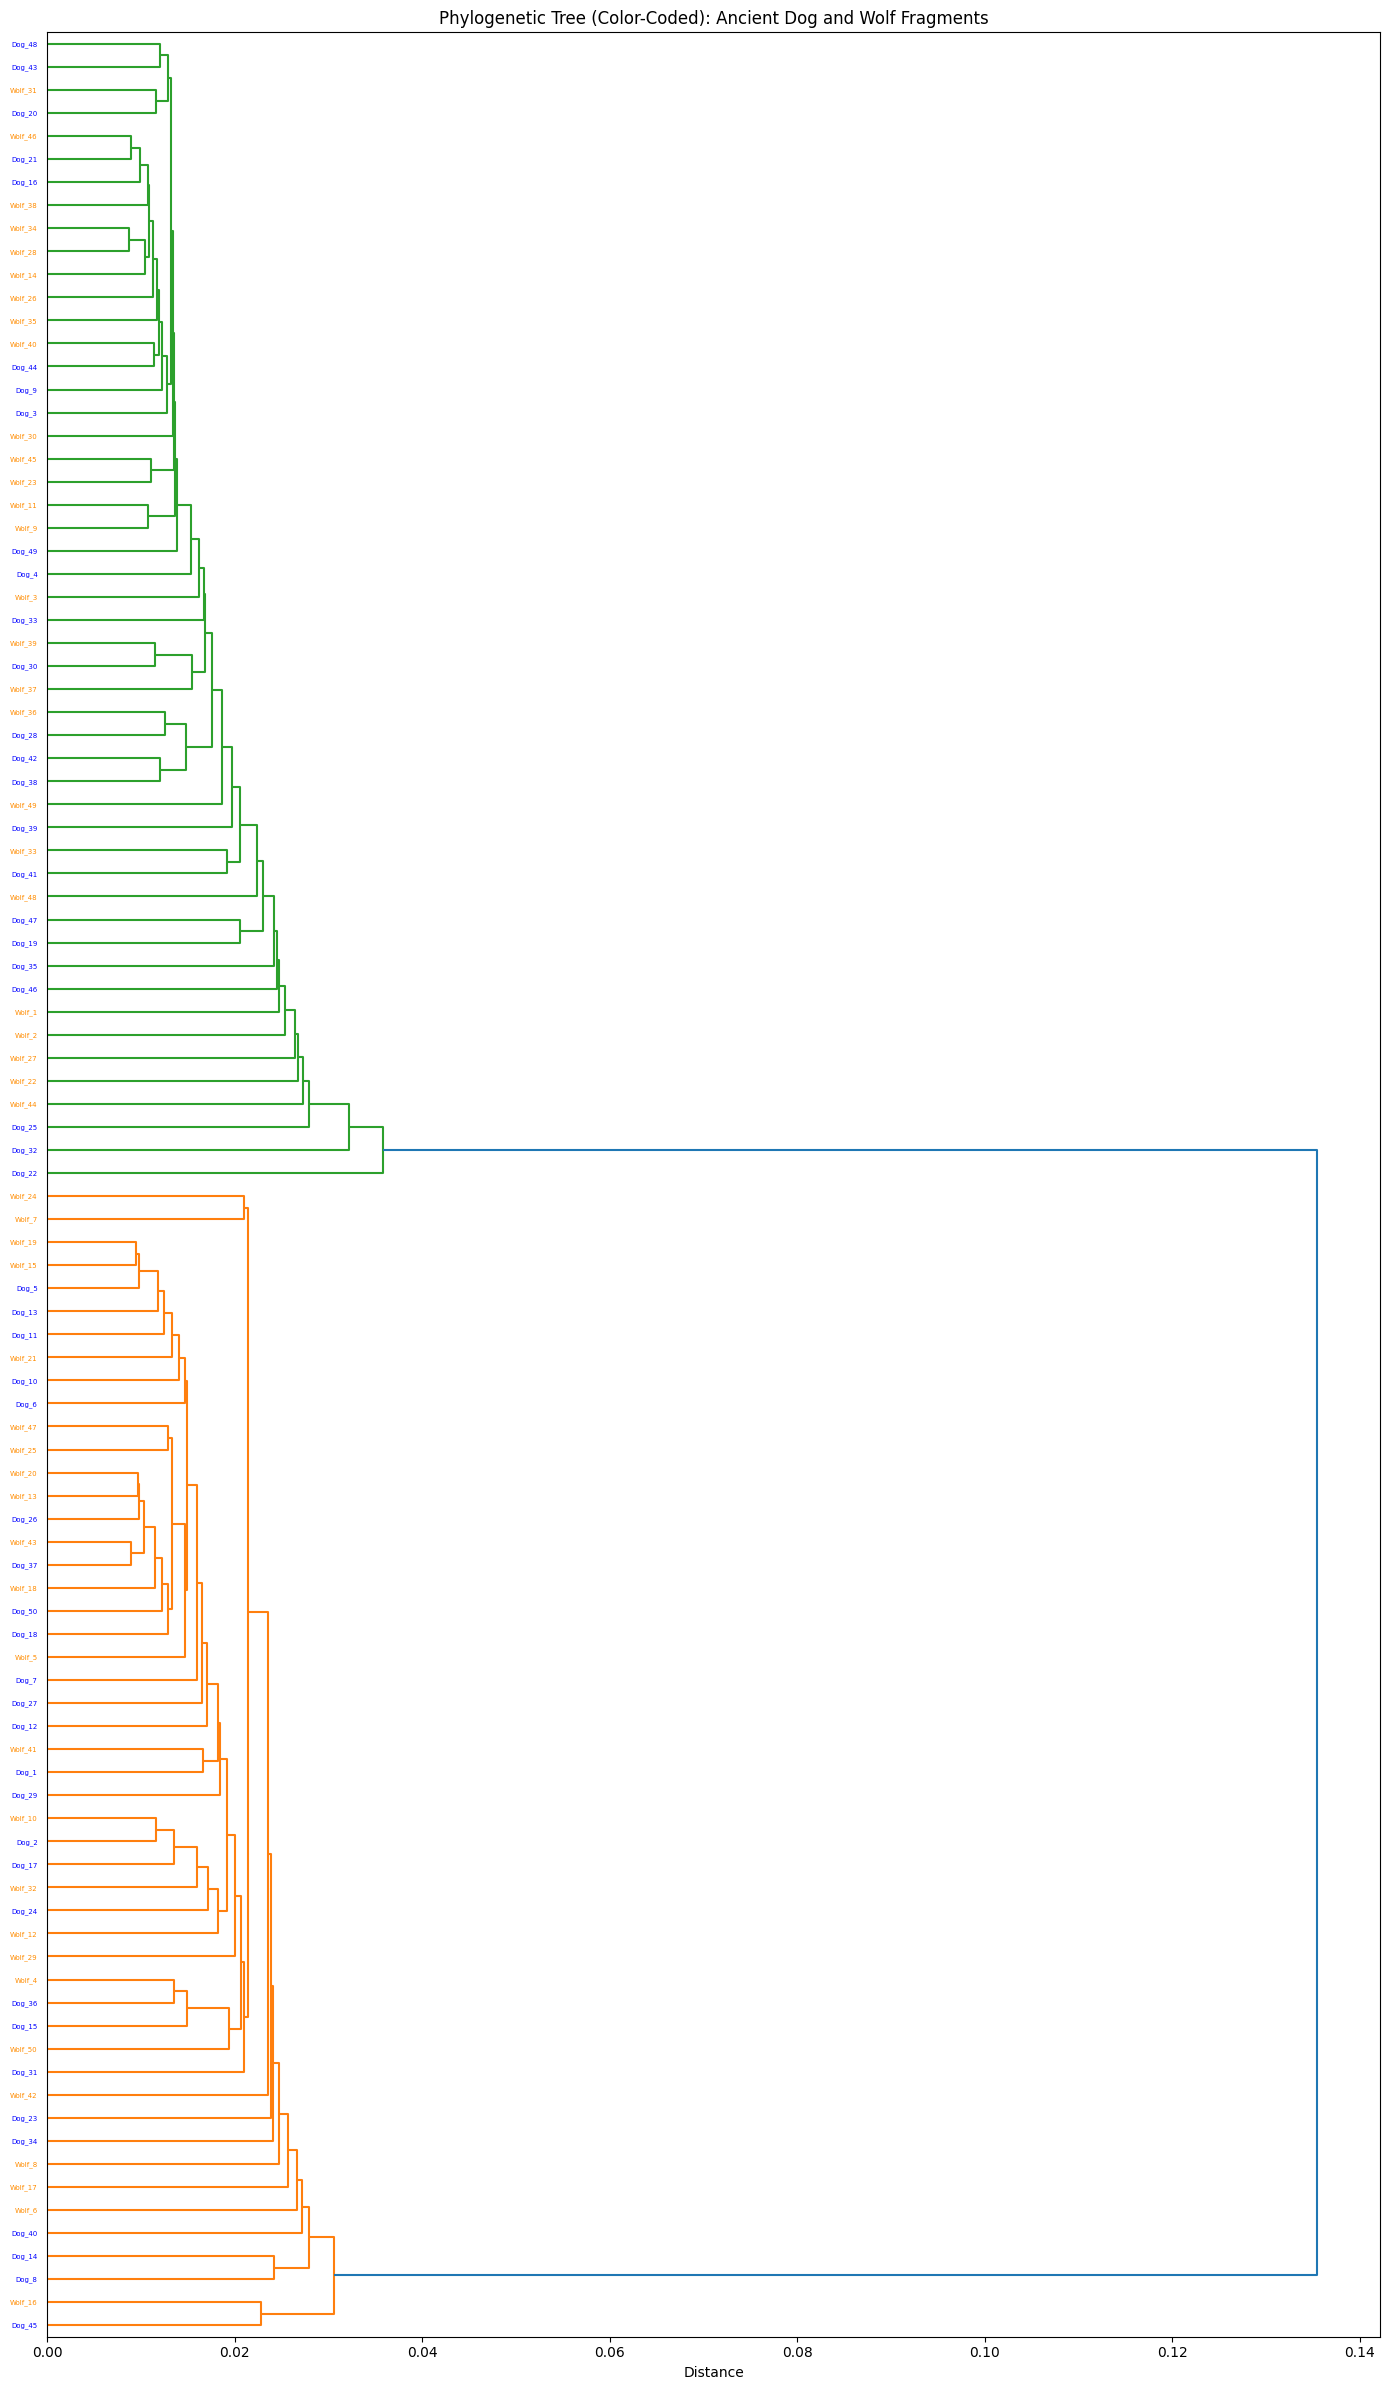

In [36]:
# Plot the dendrogram without label color first
fig, ax = plt.subplots(figsize=(14, 24))
dendro = dendrogram(linked, labels=labels, orientation='right', ax=ax)
plt.title('Phylogenetic Tree (Color-Coded): Ancient Dog and Wolf Fragments')
plt.xlabel('Distance')

# Color the tick labels manually
xtick_labels = ax.get_yticklabels()
for label in xtick_labels:
    species = label.get_text()
    if species.startswith("Dog"):
        label.set_color('blue')
    elif species.startswith("Wolf"):
        label.set_color('darkorange')

plt.tight_layout()
plt.savefig("../plots/phylogeny_50_dog_50_wolf.png", dpi=300, bbox_inches='tight')
plt.show()


In [37]:
labels_50x50 = labels
df_50x50 = pd.DataFrame(distance_matrix, index=labels_50x50, columns=labels_50x50)
df_50x50.to_csv("../data/distance_matrix_10x10.csv")


In [43]:
from ete3 import Tree
from scipy.cluster.hierarchy import linkage, to_tree
import numpy as np
from scipy.spatial.distance import squareform

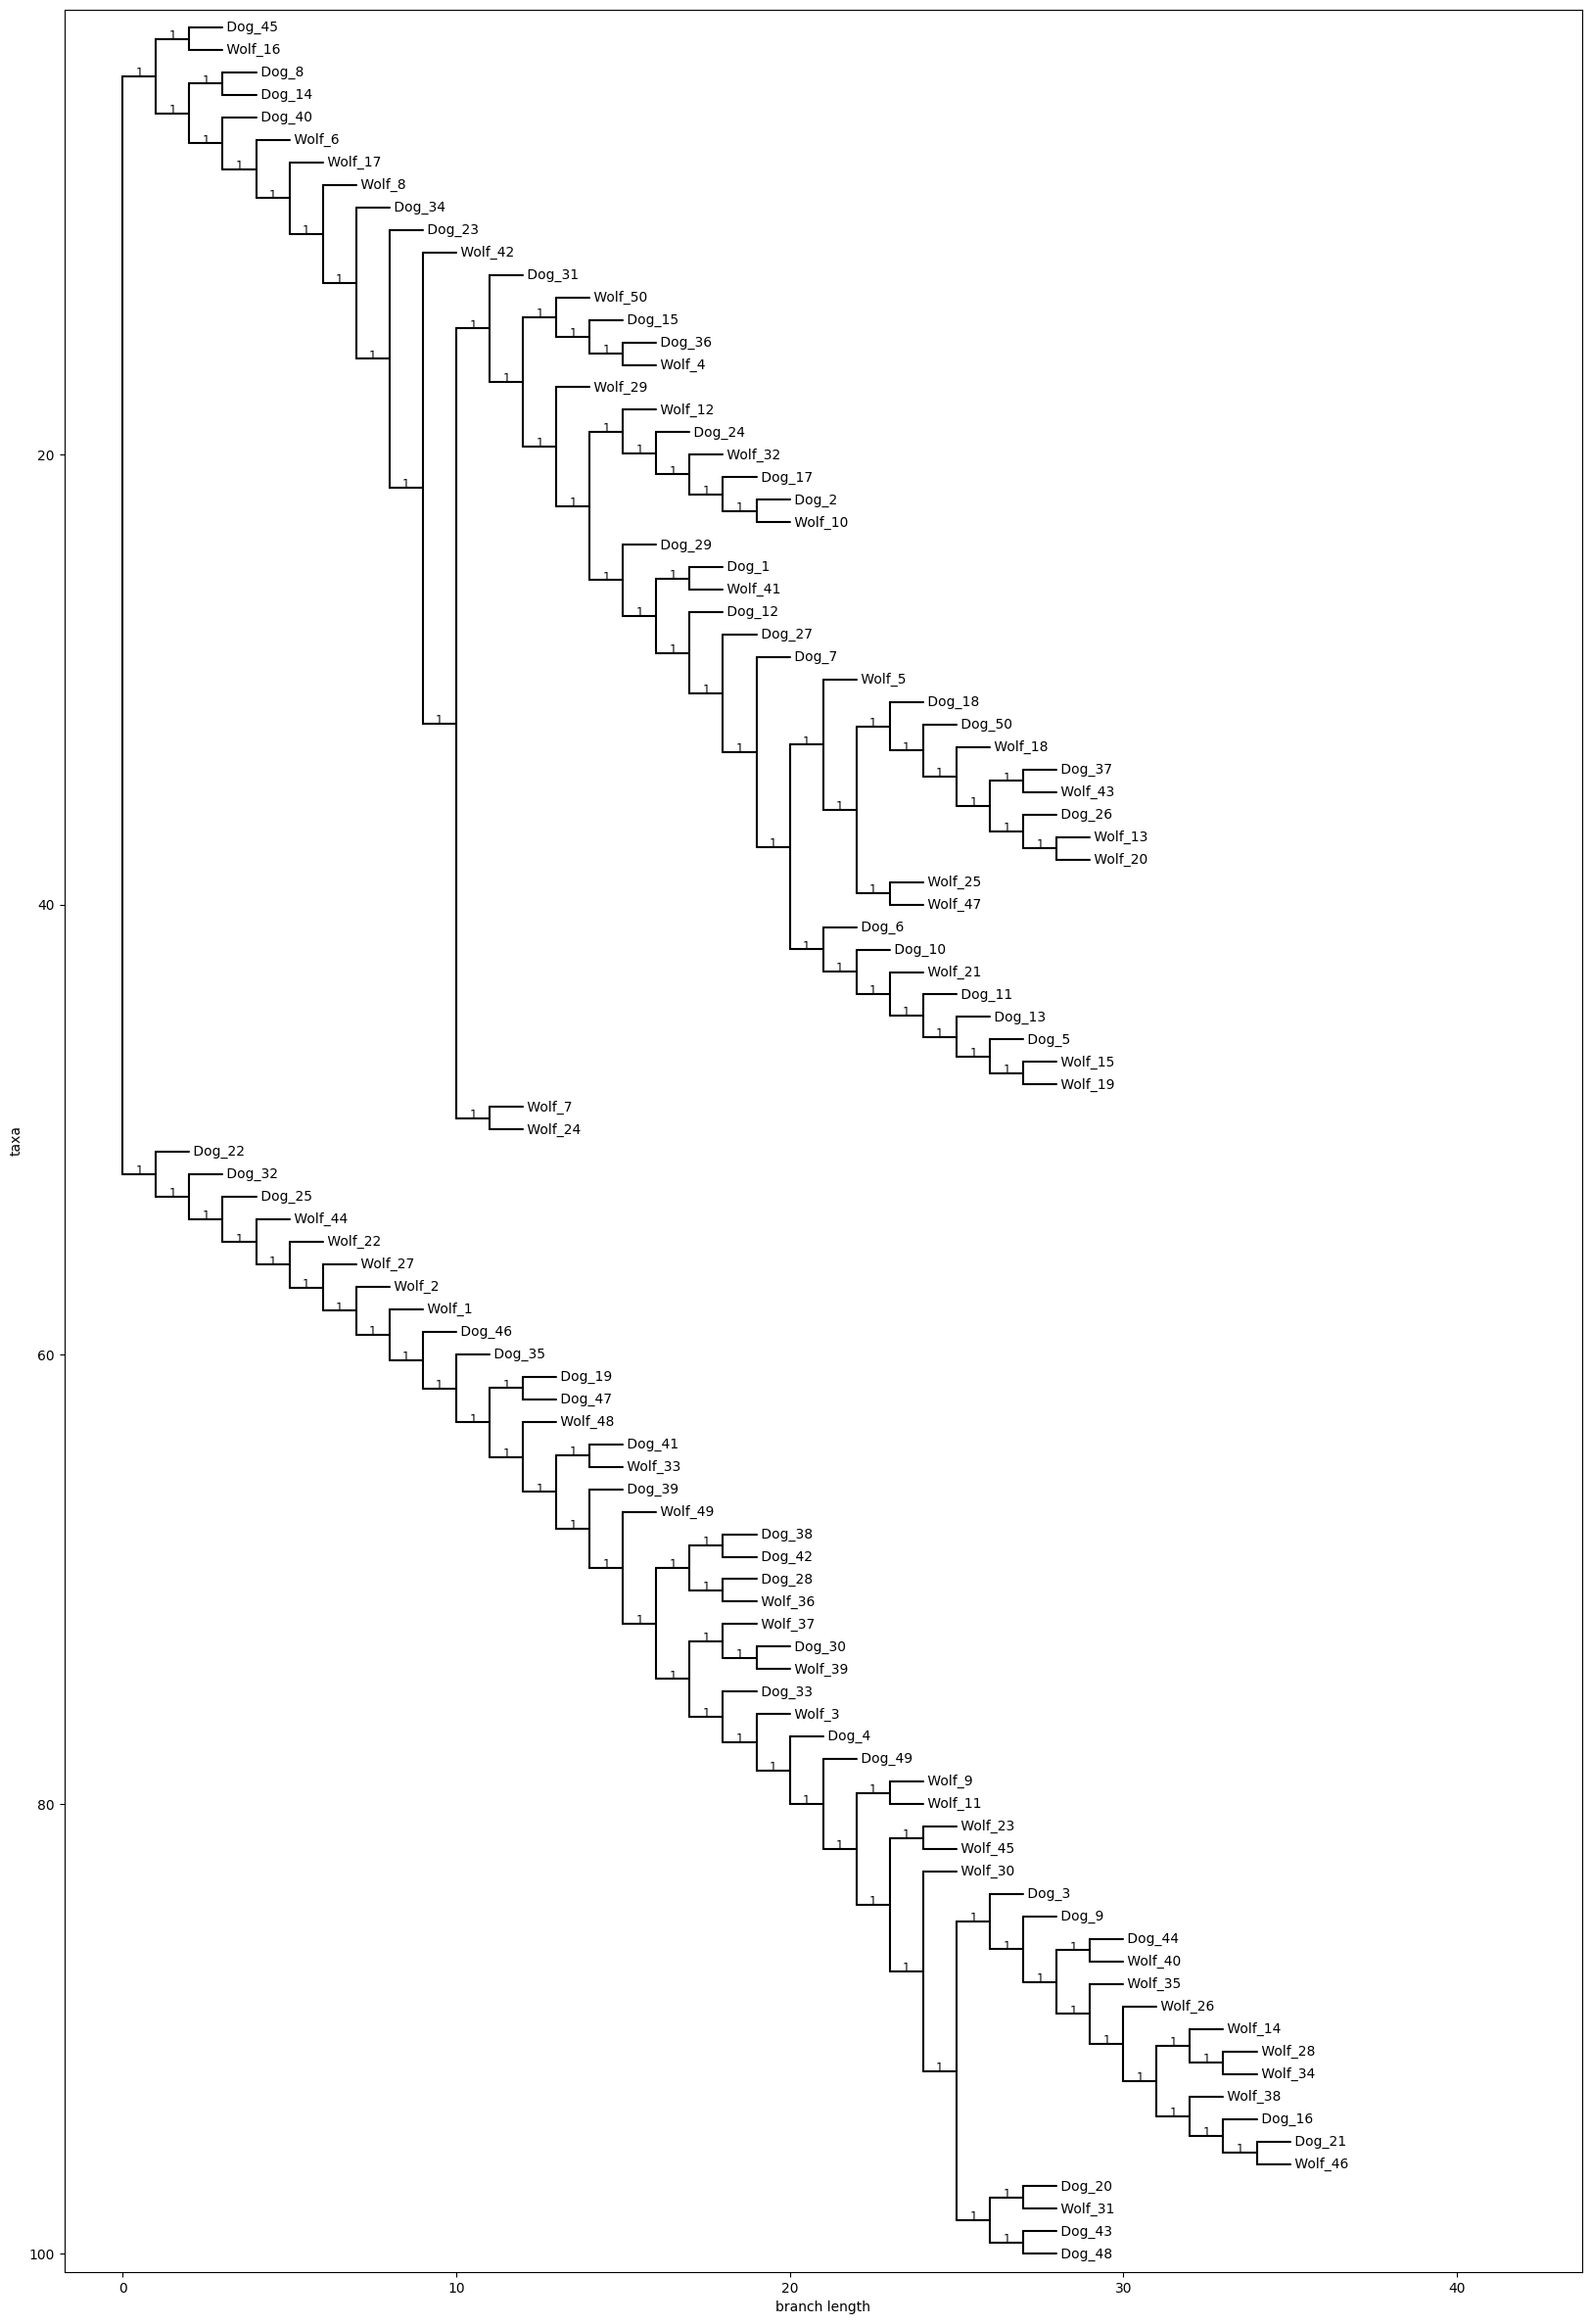

In [48]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Load the tree from your saved Newick file
tree = Phylo.read("../plots/tree_50x50.newick", "newick")

# Set up the figure
fig = plt.figure(figsize=(20, 30))  # Bigger figure for 100 fragments
axes = fig.add_subplot(1, 1, 1)

# Draw the tree
Phylo.draw(tree, do_show=True, axes=axes)

# Save as image
fig.savefig("../plots/biophylo_tree_50x50.png", dpi=300, bbox_inches="tight")
